## Wine dataset

* Dataset: https://odds.cs.stonybrook.edu/wine-dataset/

| **Dataset** 	| **Points** 	| **Dimensions** 	| **Outliers (%)** 	|
|:-----------:	|:----------:	|:--------------:	|:----------------:	|
|     Wine    	|     129    	|       13       	|     10 (7.7%)    	|

### Dataset Information:

The original Wine dataset from UCI machine learning repository is a multiclass classification dataset having:

- 13 attributes 
- 3 classes. 

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 
- Class 2, 3  - are used as inliers 
- Class 1 - is downsampled to 10 instances to be used as ouliers.




In [1]:
# import libraries
import numpy as np
import pingouin

from openset.models import IRW_score, lof, mahalanobis, template
from openset.tools import dataset_tool, visualization_tool

In [2]:
X_train, X_test, y_train, y_test = dataset_tool.load_data(data_path='../data/wine.mat',
                                                          test_size=0.2,
                                                          random_state=42)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103, 13), (103, 1), (26, 13), (26, 1))

## Local Outlier Factor (LOF) Algorithm Summary

**LOF** is an unsupervised machine learning algorithm that uses the density of data points within the distribution to identify outliers. It compares the density of a given point to the density of its neighbors, with outliers typically found in areas of low density.

> As a rule of thumb, a normal data point has a LOF between 1 and 1.5, whereas anomalous observations will have much higher LOF.

#### Key Components of LOF Algorithm

1. **Hyperparameter k**: Determines the number of neighbors. A small value of k results in a more local focus, which can increase error in noisy data, while a large k can miss local outliers.

2. **Reachability Distance**: Distances measured using methods like Euclidean, Minkowski, and Manhattan. It measures the maximum distance between two points and the k-distance of the second point. The local reachability density indicates how far one must travel from a point to reach the next point or cluster of points.

3. **Local Reachability Distance (LRD)**:
    - Formula: $ \text{LRD}(X) = \frac{1}{\sum \frac{\text{ReachabilityDistance}(X, n)}{k}} $
    - Here, $ n $ represents the neighbors up to k.

#### LOF Calculation

The LOF of a point measures its density compared to the density of its neighbors. If the density of a point is significantly lower than that of its neighbors ($\text{LOF} \gg 1$), it indicates that the point is an outlier.


##### GOOD ACCURACY

In [4]:
lof_y_pred_train_g, lof_y_score_train_g, lof_model_g = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 17,
                                      contamination = 'auto',
                                      leaf_size = 25,
                                      metric = "minkowski",
                                      p = 1)

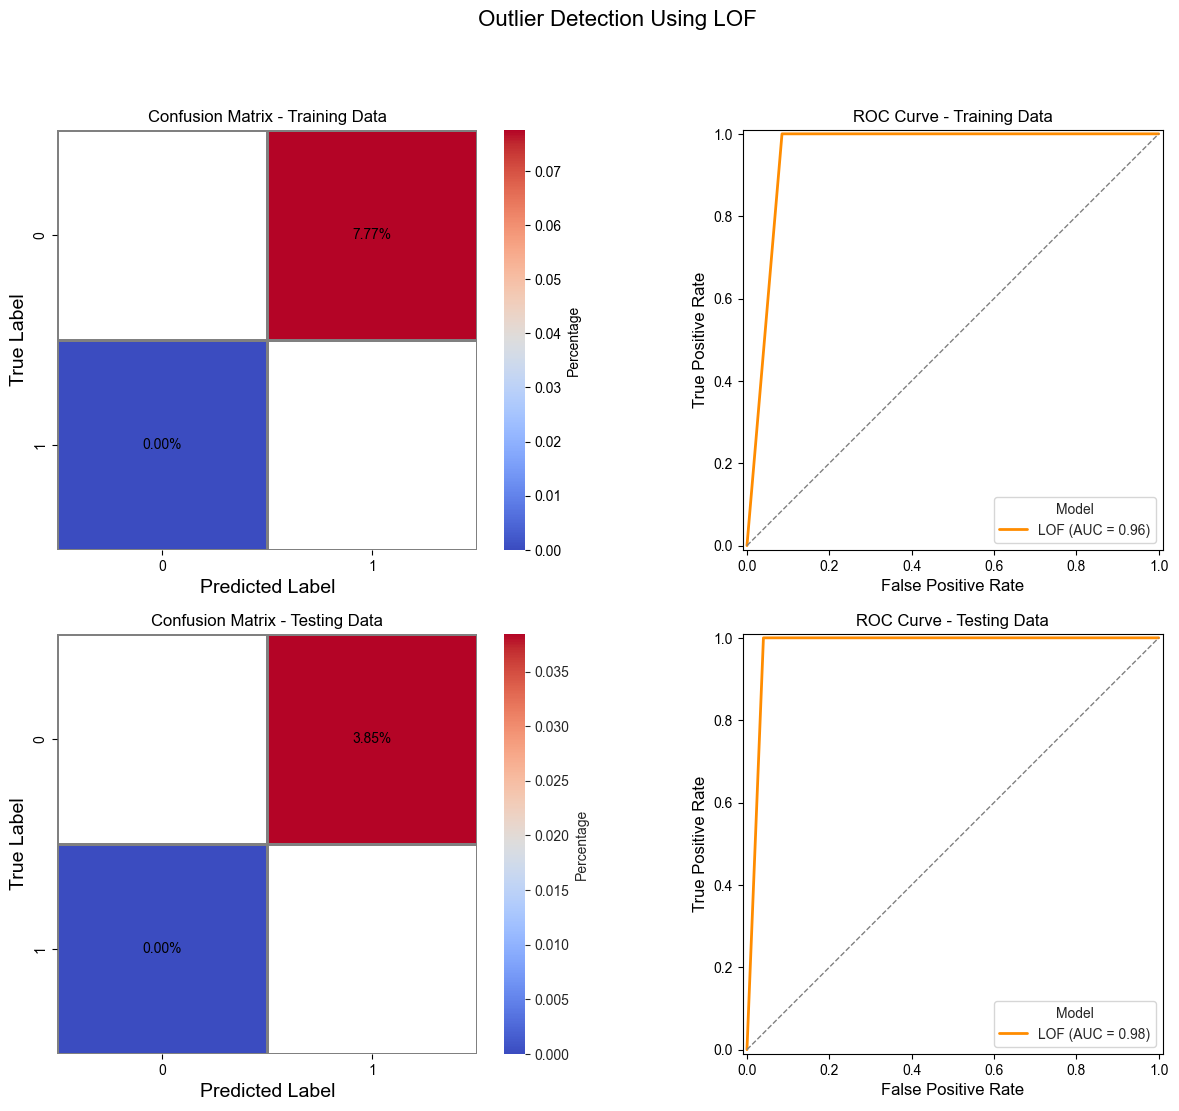

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [5]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test,
                           train_pred=None,
                           test_pred=None,
                           novelty=False,
                           n_neighbors=17,
                           contamination='auto',
                           leaf_size=25,
                           metric="minkowski", p=1)

lof_model_g = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 17,
                                      contamination = 'auto',
                                      leaf_size = 25,
                                      metric = "minkowski",
                                      p = 1)

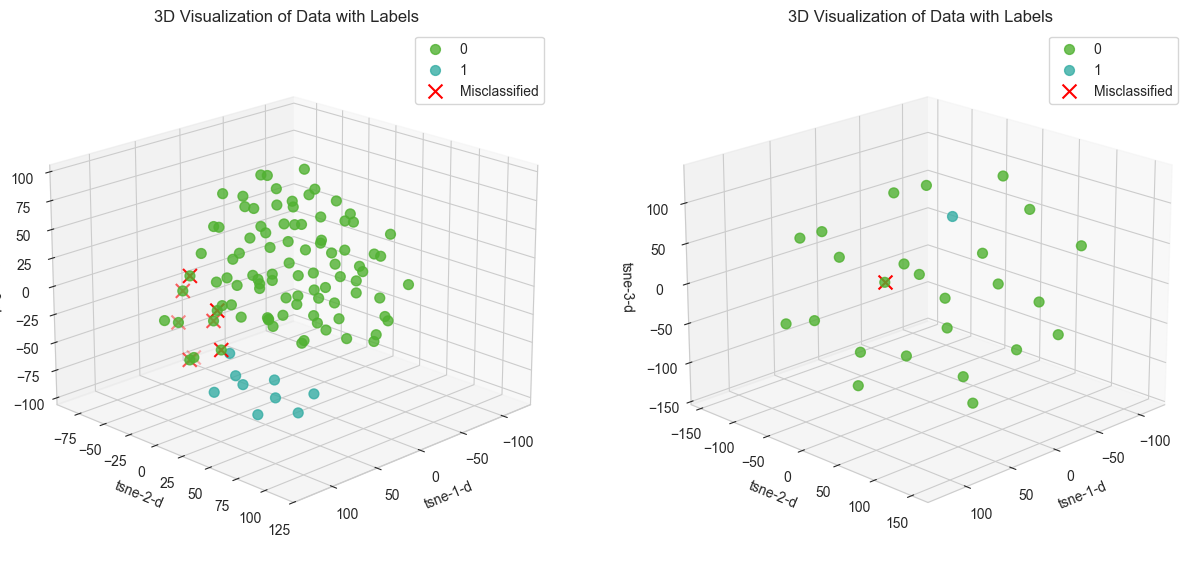

In [6]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, lof_model_g, lof_y_pred_train_g)

In [7]:
lof_y_pred_test_g, lof_y_score_test_g = lof.lof_predict_test(lof_model_g, X_test)

In [8]:
df_train = lof.lof_dataframe(y_train, lof_y_pred_train_g, lof_y_score_train_g)
df_test = lof.lof_dataframe(y_test, lof_y_pred_test_g, lof_y_score_test_g)

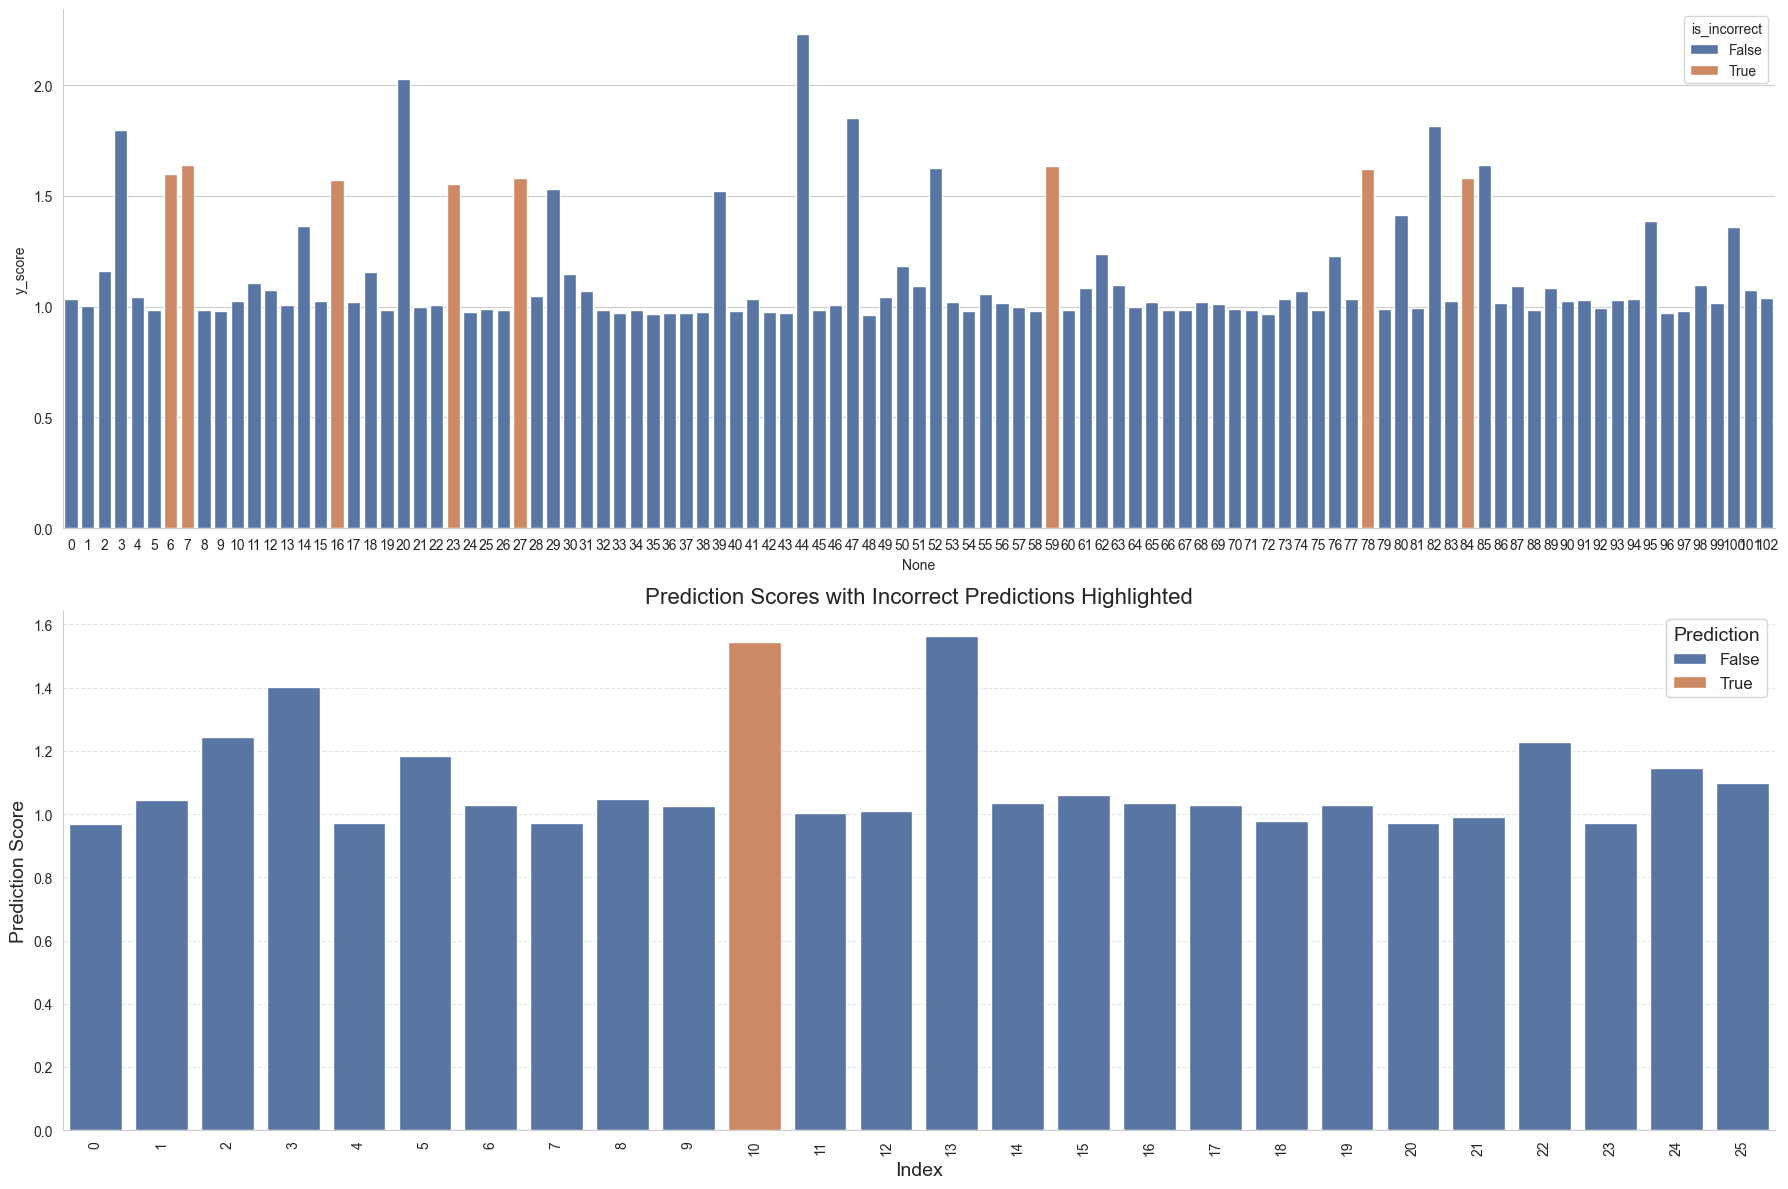

In [9]:
visualization_tool.lof_visualize_bar(df_train, df_test)

### Conclusions from the LOF Model Configuration

The configuration of the LOF model for outlier detection in `X_train` is designed to optimize the balance between sensitivity to local outliers and robustness against noise, while ensuring efficient computation.

1. **Effectiveness of Neighbor Count (n_neighbors = 17)**:
   - **Local and Global Outlier Detection**: In the wine dataset, certain local groups of wines might have similar properties due to regional production methods or grape varieties. Setting n_neighbors to 17 helps capture these local clusters while also considering broader patterns, making it possible to detect both local and global anomalies.
   - **Noise Sensitivity**: The dataset may contain noise due to measurement errors or variations in production. A moderate number of neighbors helps the model distinguish between true anomalies (e.g., a wine sample with unusually high sugar content) and random noise.

2. **Adaptive Contamination (contamination = 'auto')**:
   - **Automatic Thresholding**: The exact proportion of anomalous wines might not be known in advance. Setting contamination to 'auto' allows the model to dynamically determine this proportion based on the data, ensuring that the detection is tailored to the specific characteristics of the wine dataset.
   - **Improved Detection Accuracy**:  This adaptive approach improves accuracy by adjusting the model's sensitivity to the inherent distribution of normal and abnormal wine samples.

3. **Efficient Neighbor Search (leaf_size = 25)**:
   - **Performance Optimization**: A leaf size of 25 strikes a balance between search speed and accuracy, enabling the model to handle the dataset efficiently.
   - **Scalability**:  The efficient neighbor search makes the model scalable, suitable for large wine datasets with multiple features.

4. **Robust Distance Metric (metric = "minkowski", p = 1)**:
   - **Manhattan Distance Robustness**: Using the Manhattan distance is beneficial for the wine dataset as it is less sensitive to extreme values in any single feature (e.g., an outlier with extremely high acidity won't disproportionately affect the distance measure). This robustness ensures more reliable anomaly detection.

   - **Flexibility of Minkowski Distance**: The flexibility to adjust the p parameter allows for experimentation with different distance measures if needed, but p=1 is chosen for its robustness to outliers in this context.
ng on the data characteristics.

### Overall Benefits and Implications

- **Enhanced Outlier Detection**: The model is well-equipped to identify wines with unusual properties, whether due to errors, contamination, or genuinely unique characteristics.
- **Context-Aware Sensitivity**: Automatic contamination handling ensures the model adapts to the wine dataset, accurately determining the proportion of anomalies without manual intervention.
- **Computational Efficiency**: Efficient neighbor search ensures that the model can process large datasets quickly, making it feasible to use in real-world scenarios, such as quality control in wine production.
- **Robustness and Reliability**:  The use of Manhattan distance enhances the robustness of the model, providing reliable anomaly detection that is less affected by extreme values in the dataset.

### Bad Accuracy

In [10]:
lof_y_pred_train_b, lof_y_score_train_b, lof_model_b = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 2,
                                      contamination = 'auto',
                                      leaf_size = 2,
                                      metric = "minkowski",
                                      p = 2)

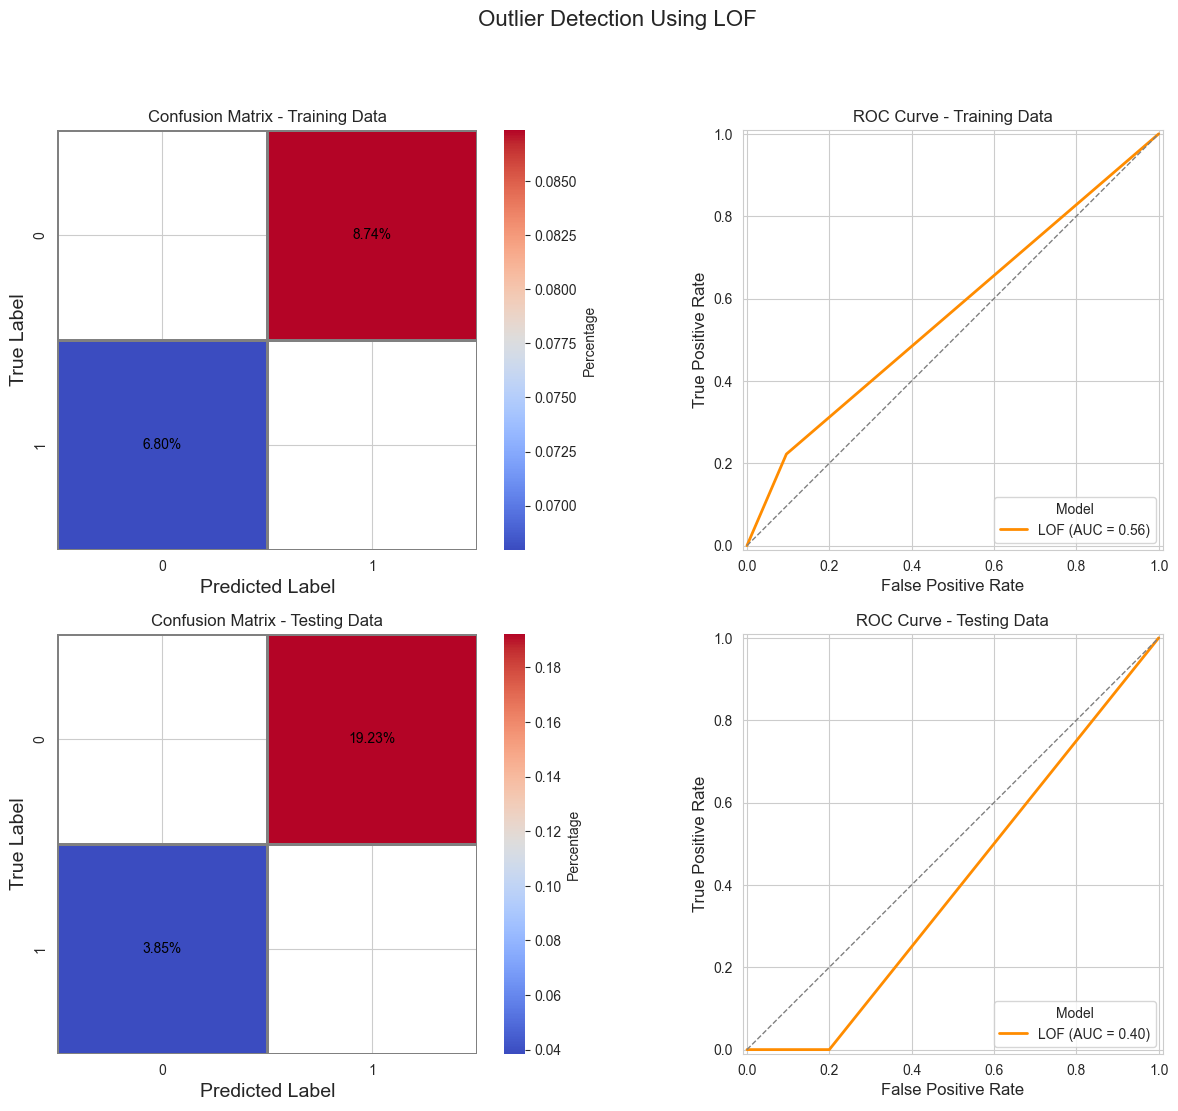

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [11]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test,
                           train_pred=None,
                           test_pred=None,
                           novelty=False,
                           n_neighbors=2,
                           contamination='auto',
                           leaf_size=2,
                           metric="minkowski", p=2)

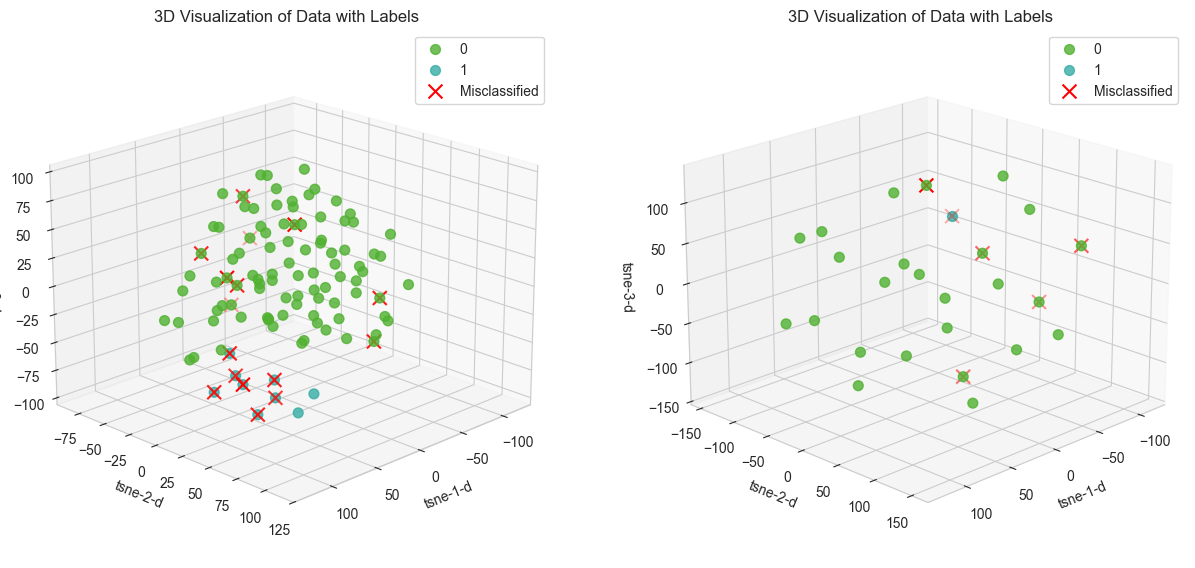

In [12]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, lof_model_b, lof_y_pred_train_b)

In [13]:
lof_y_pred_test_b, lof_y_score_test_b = lof.lof_predict_test(lof_model_b, X_test)

In [15]:
df_train = lof.lof_dataframe(y_train, lof_y_pred_train_b, lof_y_score_train_b)
df_test = lof.lof_dataframe(y_test, lof_y_pred_test_b, lof_y_score_test_b)

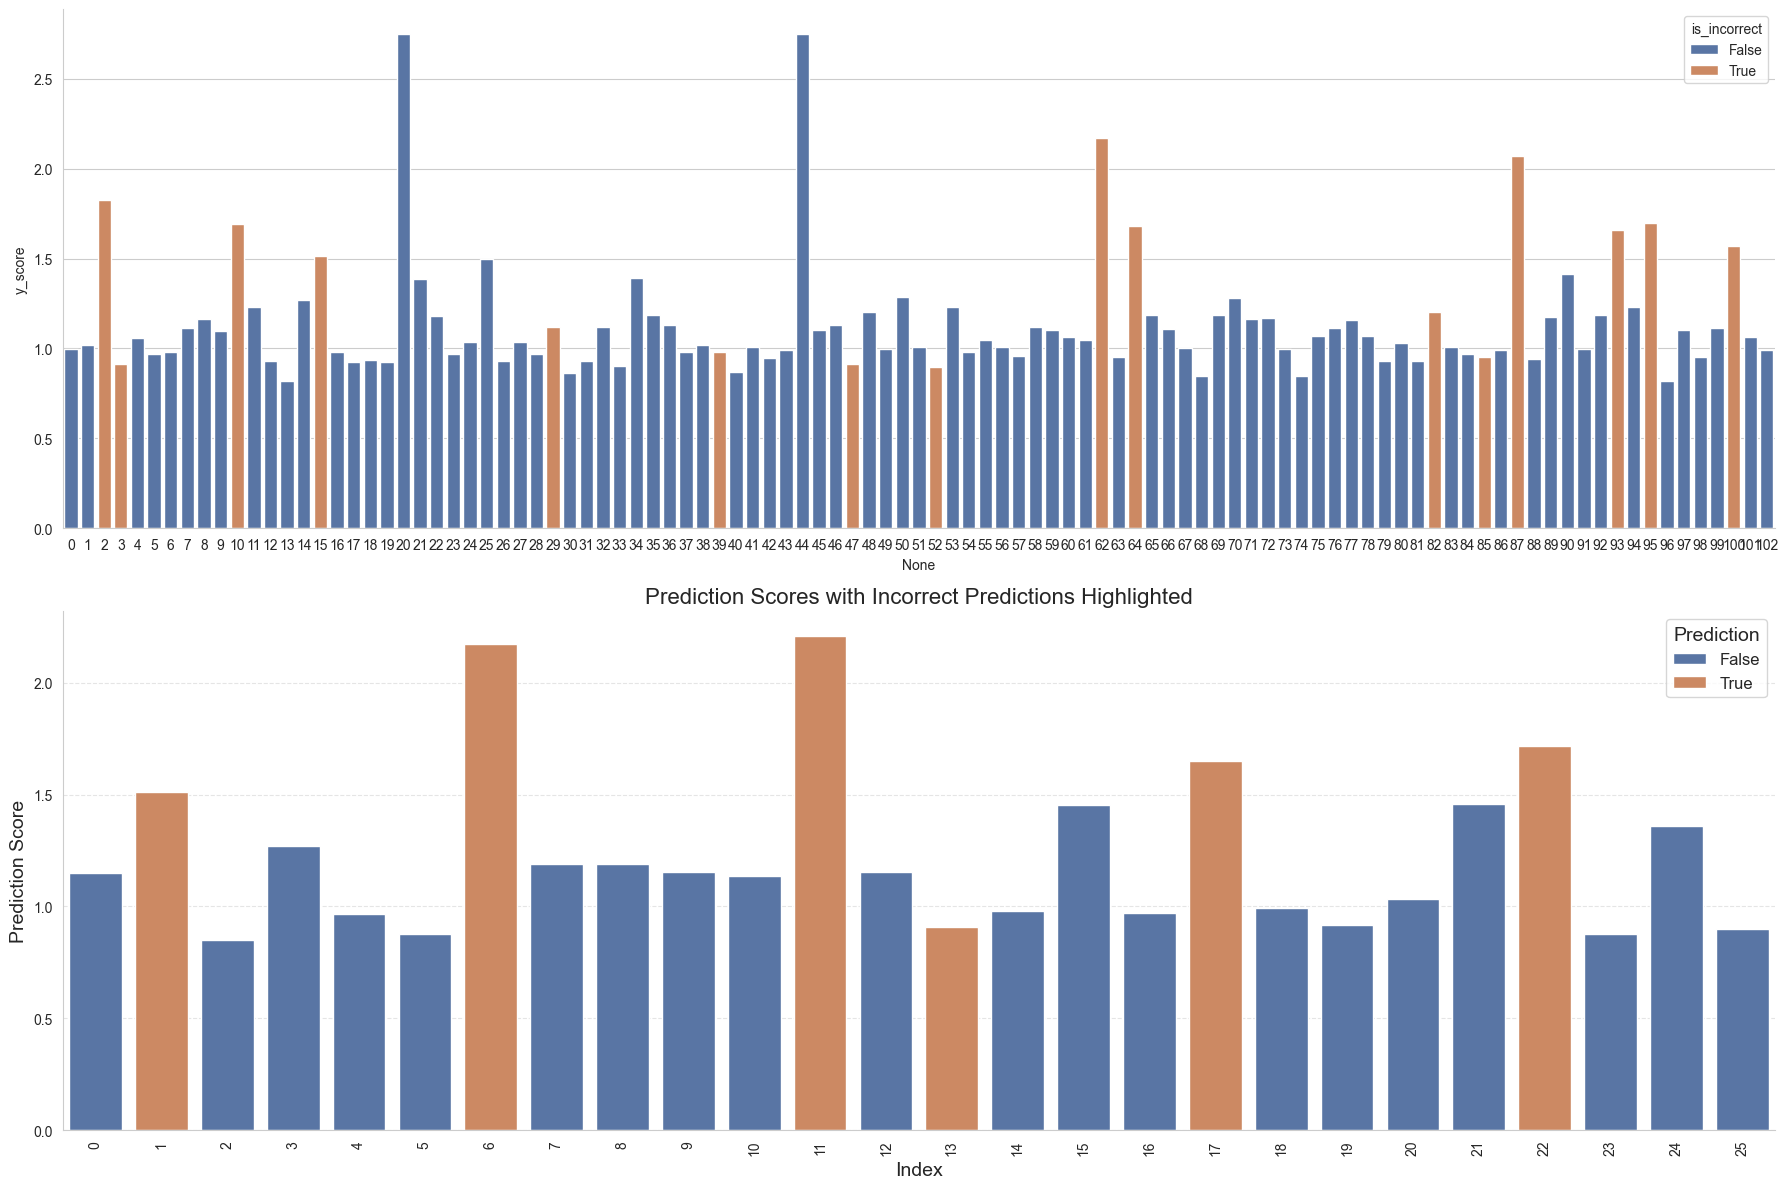

In [16]:
visualization_tool.lof_visualize_bar(df_train, df_test)

### Explanation of Poor Results with LOF Model on Wine Dataset

Likely reasons why this configuration led to poor results:

1. Neighbor Count (n_neighbors = 2):
* **Over-Sensitivity to Noise**: With only 2 neighbors, the model becomes overly sensitive to minor variations or measurement errors in the wine dataset. For example, slight differences in alcohol content or acidity levels between two similar wine samples might be incorrectly identified as anomalies.

* **Inadequate Local Context**: Using only 2 neighbors doesn't provide enough context to accurately determine if a wine sample is truly an outlier. This leads to frequent misclassification of normal variations within the wine samples as outliers.

2. Leaf Size (leaf_size = 2):
* **Inefficient Neighbor Search**: A leaf size of 2 is too small for the k-nearest neighbors algorithm, resulting in inefficient searches. In a dataset with many wine samples, this inefficiency slows down the outlier detection process significantly.

* **Increased Computational Overhead**: The small leaf size causes high computational overhead during the tree construction and querying phases, making the model slow and less practical for larger datasets.

3. Distance Metric (metric = "minkowski", p = 2):
* **Euclidean Distance Sensitivity**: Using the Minkowski distance with p=2 (Euclidean distance) makes the model sensitive to extreme values. In the wine dataset, features like sugar level or pH can have extreme values that disproportionately influence the distance calculations, leading to incorrect outlier detection.

* **Lack of Robustness**: Euclidean distance is less robust in high-dimensional spaces or datasets with significant feature variability, such as the wine dataset. This lack of robustness increases the likelihood of normal samples being classified as outliers.

**Consequences of the Poor Configuration in Wine Dataset Context**:

* **High False Positive Rate**: The model is likely to flag many normal wine samples as outliers due to its sensitivity to minor variations and extreme values. For instance, wines with slightly higher acidity might be incorrectly identified as anomalies.

* **Inaccurate Anomaly Detection**: With only 2 neighbors, the model lacks the context to accurately detect anomalies. True outliers, such as a contaminated wine batch, might be missed, while normal variations are flagged as outliers.

* **Sensitivity to Extreme Values**: The Euclidean distance metric increases the model’s sensitivity to extreme values, causing more incorrect outlier detections.

### Mahalanobis distance

This method constructs an elliptical boundary around a dataset, categorizing values within the boundary as normal and outliers as those lying outside. It is most effective when the data conforms to a Gaussian distribution. The key parameter, contamination, dictates the proportion of outliers to inliers. However, a significant limitation arises from the requirement to accurately estimate the proportion of outliers in the dataset.

In [19]:
## Check data normality
pingouin.multivariate_normality(X_train)

HZResults(hz=1.0525336030808319, pval=2.414287442971556e-31, normal=False)

The HZ test results indicate that the wine dataset significantly deviates from a normal distribution, as evidenced by a high HZ statistic and an extremely low p-value. This non-normality suggests the need for alternative analytical approaches that do not rely on the assumption of normality to ensure accurate and reliable results.

In [21]:
inliers_amount, outliers_amount = np.unique(y_train, return_counts=True)[1]
contamination = outliers_amount / inliers_amount

In [22]:
mahalanobis_y_pred_train_g, mahalanobis_model_g = mahalanobis.detect_outliers(X_train,
                                                                              contamination = contamination,
                                                                              random_state=42)

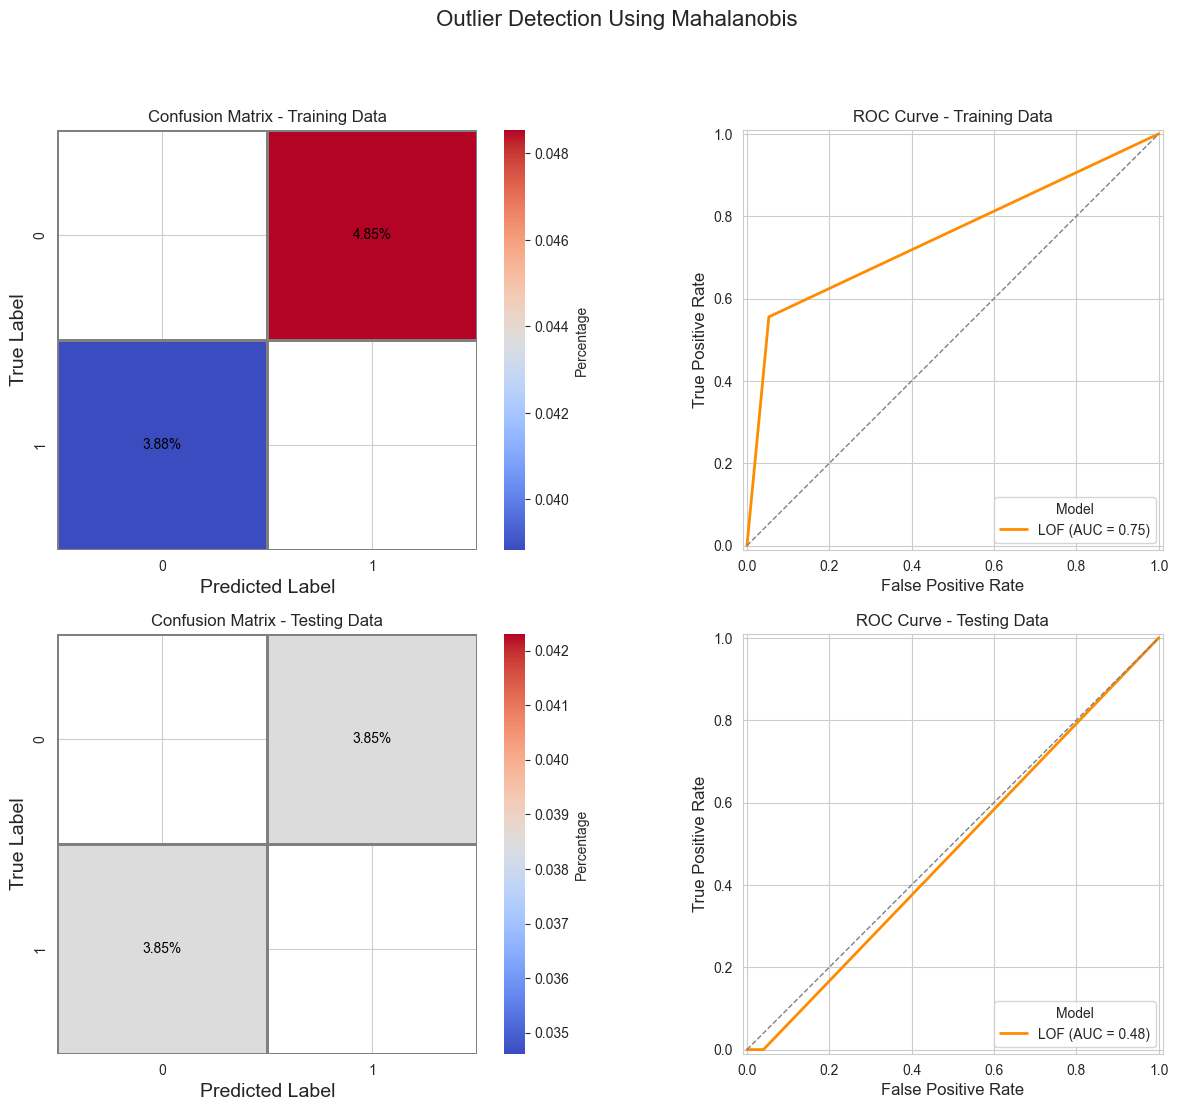

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [23]:
mahalanobis.visualize_outliers_mahalanobis(X_train,
                                           X_test,
                                           y_train,
                                           y_test,
                                           train_pred=None,
                                           test_pred=None,
                                           contamination=contamination,
                                           random_state=42)

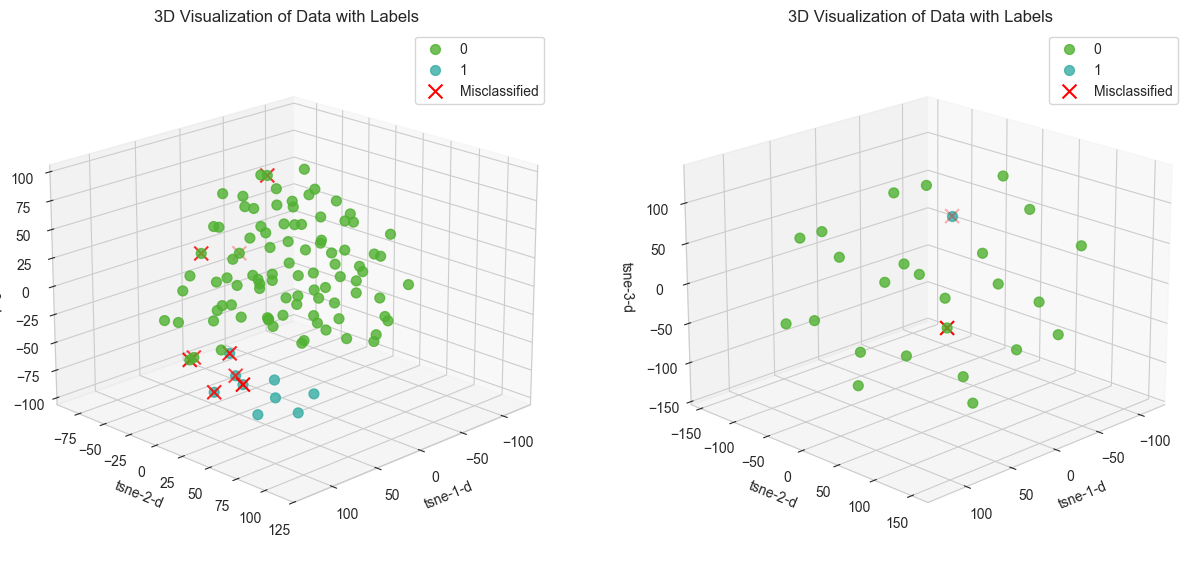

In [24]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, mahalanobis_model_g, mahalanobis_y_pred_train_g, lof=False)

In [25]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(mahalanobis_model_g,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

Model fitting completed in 0.02 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


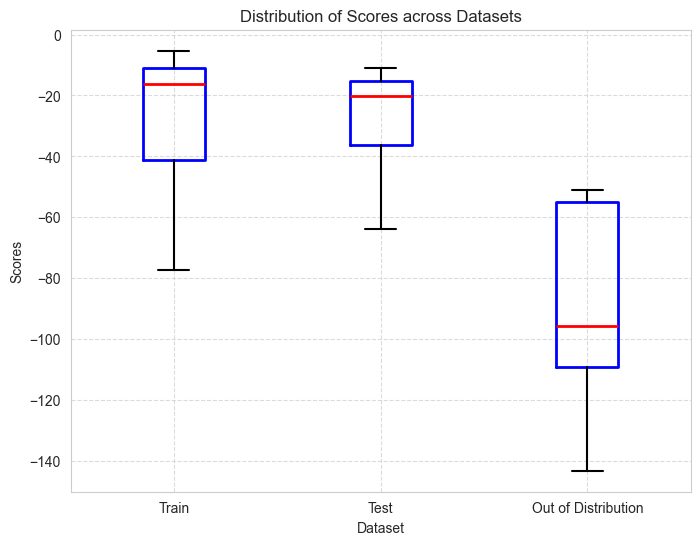

In [26]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

#### EllipticEnvelope Algorithm

The EllipticEnvelope algorithm assumes that the data follows a Gaussian distribution (multivariate normal distribution). It fits an ellipse to the central data points, assuming that the data is elliptically distributed around a central mean.

#### Reasons for Poor Results

1. **Assumption of Normality**:
   - **Mismatch with Data Distribution**: EllipticEnvelope assumes the data follows a Gaussian distribution. However, the HZ test results clearly show that the wine dataset significantly deviates from normality. This mismatch between the algorithm's assumptions and the actual data distribution leads to inaccurate modeling of the data.
   - **Inappropriate Fit**: Given the non-normality, the ellipse fitted by EllipticEnvelope may not accurately represent the true structure of the dataset, resulting in poor identification of outliers.

2. **Sensitivity to Non-Normality**:
   - **Skewness and Kurtosis**: The wine dataset may exhibit skewness (asymmetry) and kurtosis (heavy tails or peakedness) that the EllipticEnvelope algorithm cannot handle effectively. These characteristics distort the shape of the data distribution, making the elliptical model inappropriate.
   - **Outliers and Noise**: Non-normal data often contains more outliers or noise that do not conform to the assumed Gaussian distribution. EllipticEnvelope may fail to distinguish between true outliers and normal data points, leading to high false positive or false negative rates.

3. **Dimensionality Issues**:
   - **Feature Interactions**: In high-dimensional spaces, the interactions between features can be complex and not well-represented by an elliptical model. The wine dataset, with its multiple chemical properties, may have such interactions that are better captured by models not assuming normality.


### IRW

In [16]:
model_irw = IRW_score.IRWDepth(contamination=contamination)
model_irw.fit(X_train)

Fitted IRWDepth model with 1000 projections in 13 dimensions.


True

In [17]:
model_irw._threshold = 0.12

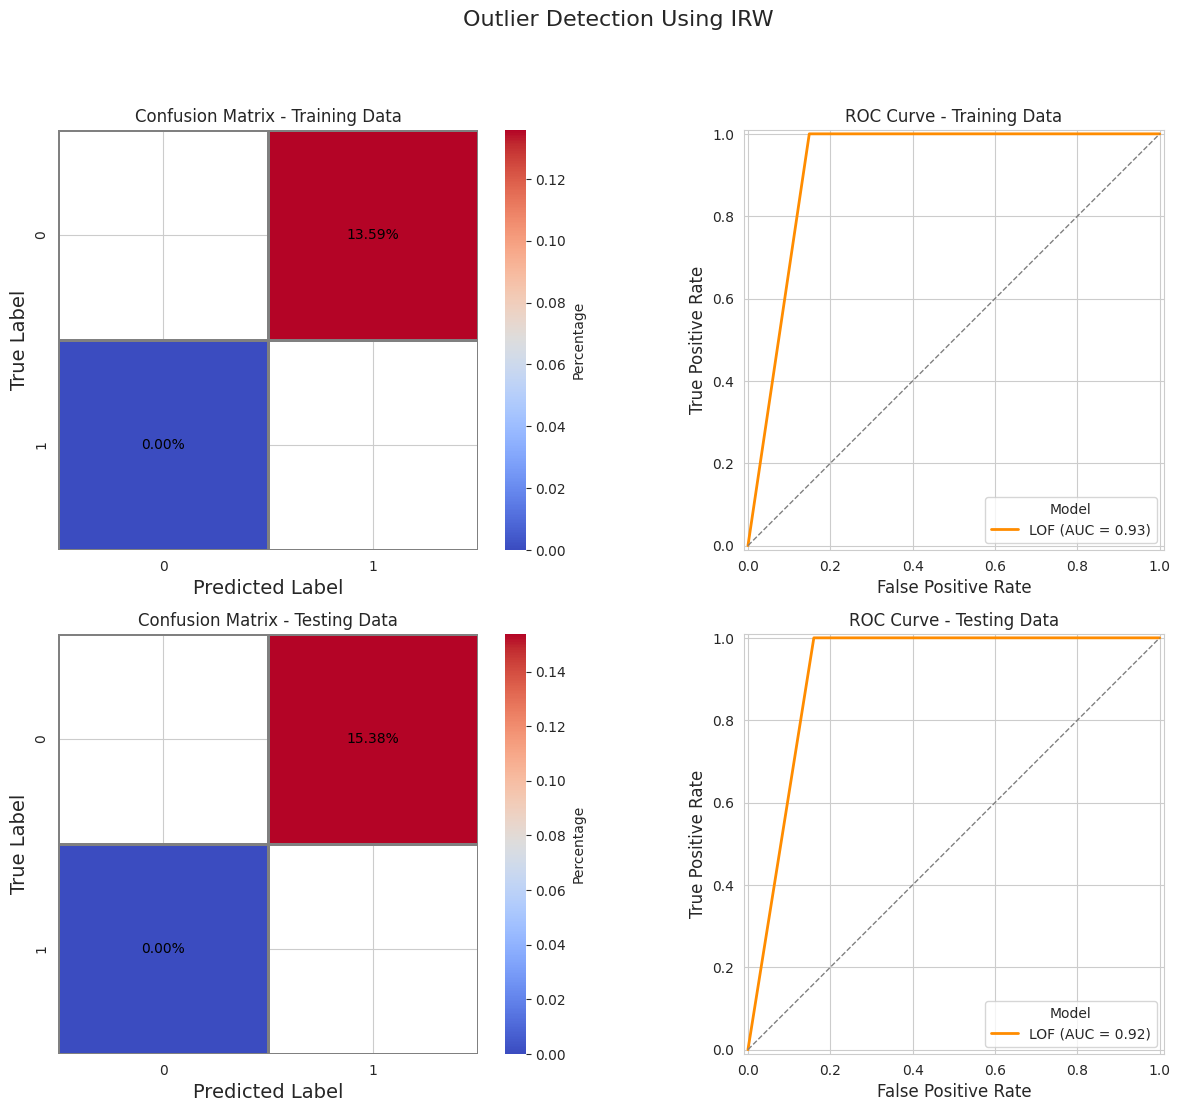

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

0

In [18]:
IRW_score.visualize_outliers_irw(X_train, X_test, y_train, y_test, model=model_irw)

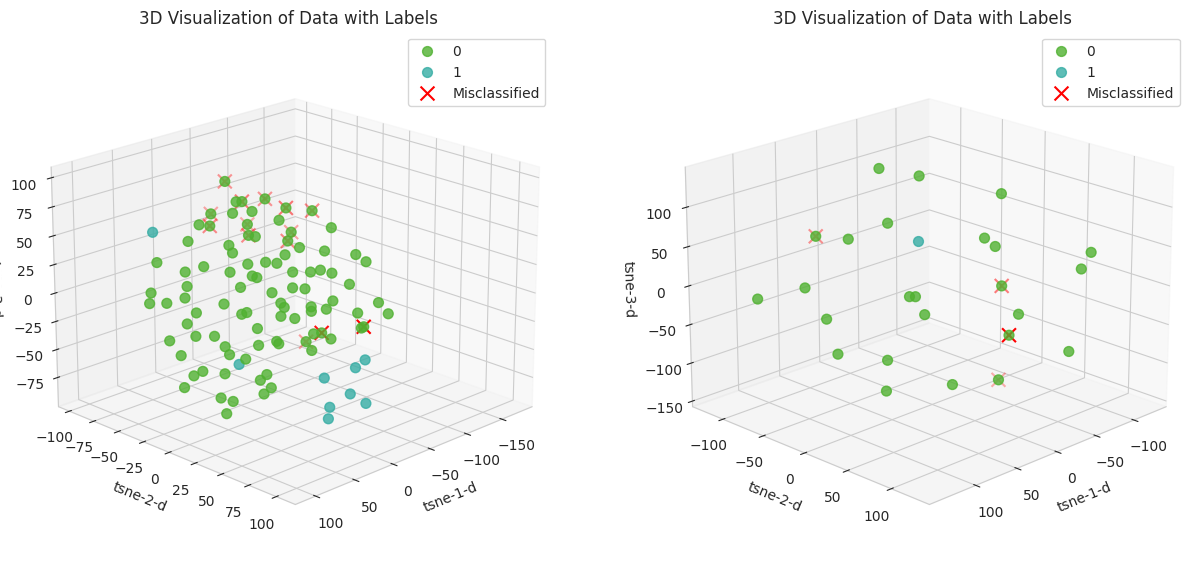

In [20]:
visualization_tool.visualize_results_3D_plane(X_train, y_train, X_test, y_test, model_irw, model_irw.predict(X_train), lof=False, irw=True)

In [21]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(model_irw,
                                                                     X_train,
                                                                     X_test,
                                                                     y_train)

Fitted IRWDepth model with 1000 projections in 13 dimensions.
Model fitting completed in 0.01 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


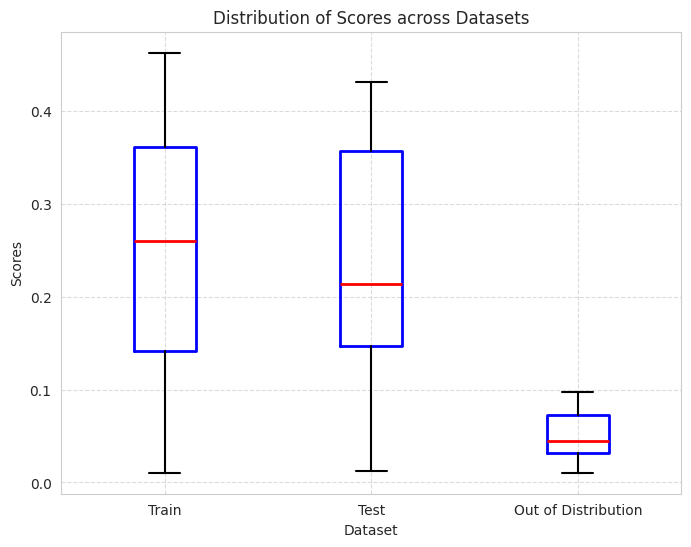

In [22]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

### IRW Depth results

* **Handling High Dimensionality**: The wine dataset has multiple features, and IRWDepth effectively reduces dimensionality through random projections while preserving essential data characteristics.

* **Robust Depth Calculation**: Using rank-based depth calculations, IRWDepth is less sensitive to extreme values and non-Gaussian distributions, which are common in real-world datasets like wine data.

* **Effective Anomaly Detection**: By focusing on the centrality of each sample across multiple projections, the algorithm accurately identifies wines that deviate significantly from the norm. These anomalies could represent rare or experimental wines, errors in production, or data entry mistakes.

* **Adaptability**: The contamination parameter allows the algorithm to be tuned for different levels of outlier prevalence, making it versatile for various subsets of wine data.

The IRWDepth algorithm excels in detecting anomalies in the wine dataset due to its robust handling of high-dimensional data, effective depth-based scoring, and adaptable thresholding. This allows it to accurately identify unusual wines that differ significantly from the norm.